In [27]:
# Importing the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("datasets/311_Service_Requests_from_2010_to_Present.csv", low_memory=False)

In [3]:
# Shape of the dataset

shape=df.shape

print(f"Number of rows: {shape[0]}")
print(f"Number of cols: {shape[1]}")

Number of rows: 364558
Number of cols: 53


In [4]:
df.head(10)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
5,32306554,12/31/2015 11:56:30 PM,01/01/2016 01:50:11 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,260 21 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.660823,-73.992568,"(40.66082272389114, -73.99256786342693)"
6,32306559,12/31/2015 11:55:32 PM,01/01/2016 01:53:54 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10032.0,524 WEST 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.840848,-73.937375,"(40.840847591440415, -73.9373750864581)"
7,32307009,12/31/2015 11:54:05 PM,01/01/2016 01:42:54 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10457.0,501 EAST 171 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837503,-73.902905,"(40.83750262540012, -73.90290517326568)"
8,32308581,12/31/2015 11:53:58 PM,01/01/2016 08:27:32 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11415.0,83-44 LEFFERTS BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.704977,-73.832605,"(40.704977164399935, -73.8326047502584)"
9,32308391,12/31/2015 11:53:58 PM,01/01/2016 01:17:40 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11219.0,1408 66 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.623793,-73.999539,"(40.623793065806524, -73.99953890121567)"


In [5]:
# Let's find out the missing values

df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [6]:
# To make it more reliable, let's make a function to return only the columns with missing values

def missing_values_table(df:pd.DataFrame)->pd.DataFrame:
    cols=df.columns.to_list()
    dataframe={
        "col_name":[],
        "num_missing":[],
        "percentage_missing":[],
        "dtype":[]
    }
    for col in cols:
        missing_count=int(df[col].isnull().sum())
        if missing_count!=0:
            dataframe["col_name"].append(col)
            dataframe["num_missing"].append(missing_count)
            dataframe["percentage_missing"].append(round((missing_count/shape[0])*100,2))
            dataframe["dtype"].append(df[col].dtype)
    return pd.DataFrame(data=dataframe)

In [7]:
missing_df=missing_values_table(df)

In [8]:
missing_df

,col_name,num_missing,percentage_missing,dtype
0,Closed Date,2381,0.65,str
1,Descriptor,6501,1.78,str
2,Location Type,133,0.04,str
3,Incident Zip,2998,0.82,float64
4,Incident Address,51699,14.18,str
5,Street Name,51699,14.18,str
6,Cross Street 1,57188,15.69,str
7,Cross Street 2,57805,15.86,str
8,Intersection Street 1,313438,85.98,str
9,Intersection Street 2,314046,86.14,str


In [9]:
# As we can see, there are many columns with too many missing values. Let's drop the cols with missing values of more than 50%

# Let's filter the column names
cols_to_drop=missing_df[missing_df["percentage_missing"]>50]["col_name"].values.tolist()
cols_to_drop

['Intersection Street 1',
 'Intersection Street 2',
 'Landmark',
 'School or Citywide Complaint',
 'Vehicle Type',
 'Taxi Company Borough',
 'Taxi Pick Up Location',
 'Bridge Highway Name',
 'Bridge Highway Direction',
 'Road Ramp',
 'Bridge Highway Segment',
 'Garage Lot Name',
 'Ferry Direction',
 'Ferry Terminal Name']

In [10]:
# Let's drop these columns

df=df.drop(cols_to_drop, axis=1)

In [11]:
missing_values_table(df)

,col_name,num_missing,percentage_missing,dtype
0,Closed Date,2381,0.65,str
1,Descriptor,6501,1.78,str
2,Location Type,133,0.04,str
3,Incident Zip,2998,0.82,float64
4,Incident Address,51699,14.18,str
5,Street Name,51699,14.18,str
6,Cross Street 1,57188,15.69,str
7,Cross Street 2,57805,15.86,str
8,Address Type,3252,0.89,str
9,City,2997,0.82,str


In [12]:
# Now we can see, that we have dropped the columns with very high missing values

# The remaining columns with null values can be imputed with either mean, median or mode. Let's start with "Closed Date"
df["Closed Date"].unique()

<StringArray>
['01/01/2016 12:55:15 AM', '01/01/2016 01:26:57 AM', '01/01/2016 04:51:03 AM',
 '01/01/2016 07:43:13 AM', '01/01/2016 03:24:42 AM', '01/01/2016 01:50:11 AM',
 '01/01/2016 01:53:54 AM', '01/01/2016 01:42:54 AM', '01/01/2016 08:27:32 AM',
 '01/01/2016 01:17:40 AM',
 ...
 '01/01/2015 12:56:37 AM', '01/01/2015 02:42:23 AM', '01/01/2015 01:17:43 AM',
 '01/01/2015 06:05:18 AM', '01/01/2015 12:43:41 AM', '01/01/2015 01:22:10 AM',
 '01/01/2015 10:22:31 AM', '01/01/2015 02:25:02 AM', '01/01/2015 12:20:33 AM',
 '01/01/2015 02:42:22 AM']
Length: 339838, dtype: str

In [13]:
# Let's convert this column to datetime and drop the rows null values
df["Closed Date"]=pd.to_datetime(df["Closed Date"], format="%m/%d/%Y %I:%M:%S %p", errors="coerce")

In [14]:
df["Closed Date"]

0        2016-01-01 00:55:15
1        2016-01-01 01:26:57
2        2016-01-01 04:51:03
3        2016-01-01 07:43:13
4        2016-01-01 03:24:42
                 ...        
364553   2015-01-01 10:22:31
364554   2015-01-01 02:25:02
364555   2015-01-01 00:20:33
364556   2015-01-01 02:42:22
364557   2015-01-01 02:47:50
Name: Closed Date, Length: 364558, dtype: datetime64[us]

In [15]:
df=df.dropna(subset=["Closed Date"])

In [16]:
df["Closed Date"].isnull().sum()

np.int64(0)

In [17]:
missing_values_table(df)

,col_name,num_missing,percentage_missing,dtype
0,Descriptor,6496,1.78,str
1,Location Type,130,0.04,str
2,Incident Zip,675,0.19,float64
3,Incident Address,51686,14.18,str
4,Street Name,51686,14.18,str
5,Cross Street 1,55331,15.18,str
6,Cross Street 2,55464,15.21,str
7,Address Type,929,0.25,str
8,City,674,0.18,str
9,Facility Type,18,0.00,str


In [18]:
# On the basis of visual inspection, rows with null values need to be dropped as it cannot be imputed with any value

df=df.dropna()

In [19]:
missing_values_table(df)

,col_name,num_missing,percentage_missing,dtype


In [20]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Address Type', 'City', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'Latitude', 'Longitude', 'Location'],
      dtype='str')

In [21]:
df.info()

<class 'pandas.DataFrame'>
Index: 300932 entries, 0 to 364557
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      300932 non-null  int64         
 1   Created Date                    300932 non-null  str           
 2   Closed Date                     300932 non-null  datetime64[us]
 3   Agency                          300932 non-null  str           
 4   Agency Name                     300932 non-null  str           
 5   Complaint Type                  300932 non-null  str           
 6   Descriptor                      300932 non-null  str           
 7   Location Type                   300932 non-null  str           
 8   Incident Zip                    300932 non-null  float64       
 9   Incident Address                300932 non-null  str           
 10  Street Name                     300932 non-null  str           
 11  Cro

In [22]:
# Let's convert created date from a string to datetime

df["Created Date"]

0         12/31/2015 11:59:45 PM
1         12/31/2015 11:59:44 PM
2         12/31/2015 11:59:29 PM
3         12/31/2015 11:57:46 PM
4         12/31/2015 11:56:58 PM
                   ...          
364553    01/01/2015 12:04:44 AM
364554    01/01/2015 12:04:28 AM
364555    01/01/2015 12:01:30 AM
364556    01/01/2015 12:01:29 AM
364557    01/01/2015 12:00:50 AM
Name: Created Date, Length: 300932, dtype: str

In [23]:
df["Created Date"]=pd.to_datetime(df["Created Date"], format="%m/%d/%Y %I:%M:%S %p", errors="coerce")

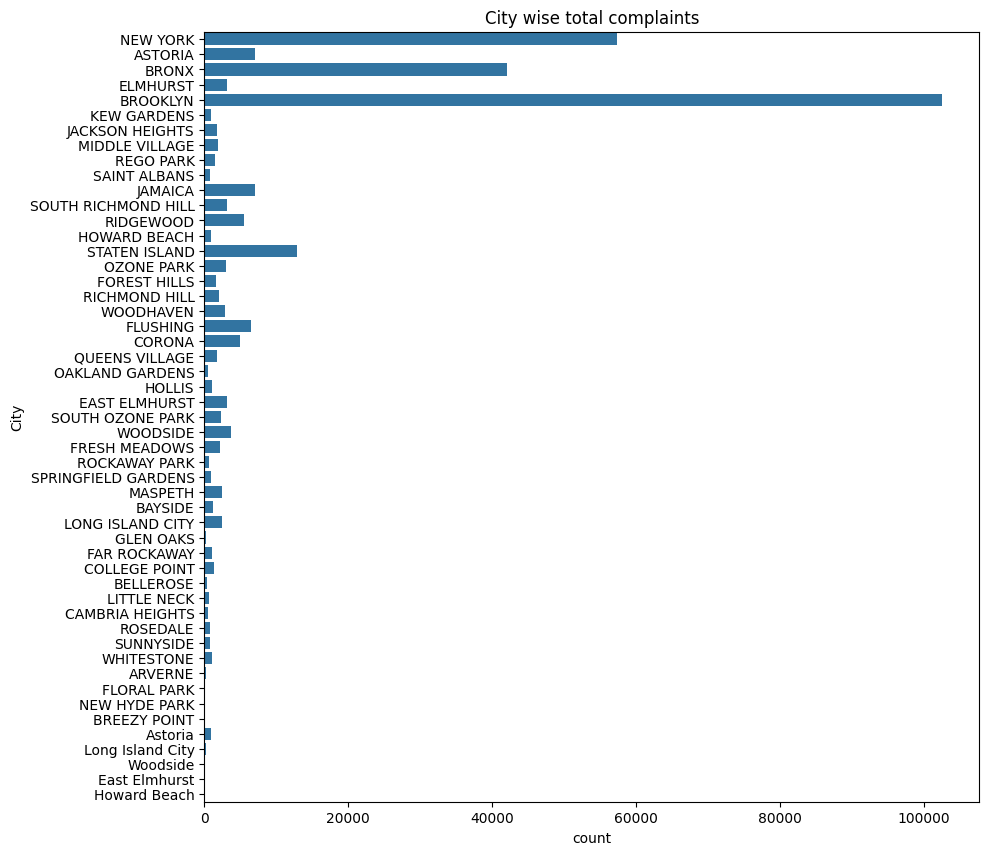

In [32]:
# Let's plot a frequency plot for city wise complaints

plt.figure(figsize=(10,10))
sns.countplot(data=df, y="City")
plt.title("City wise total complaints")
plt.show()

In [49]:
# Let's see the top 5 cities

top5city=df["City"].value_counts().head(5).index.to_list()

In [50]:
top5city

['BROOKLYN', 'NEW YORK', 'BRONX', 'STATEN ISLAND', 'JAMAICA']

In [51]:
top5city_df=df[df["City"].isin(top5city)]

In [52]:
top5city_df

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
5,32306554,2015-12-31 23:56:30,2016-01-01 01:50:11,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,260 21 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.660823,-73.992568,"(40.66082272389114, -73.99256786342693)"
6,32306559,2015-12-31 23:55:32,2016-01-01 01:53:54,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10032.0,524 WEST 169 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.840848,-73.937375,"(40.840847591440415, -73.9373750864581)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364548,29613386,2015-01-01 00:08:34,2015-01-01 02:42:23,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10467.0,800 EAST 219 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.882518,-73.859512,"(40.88251771805485, -73.85951186951999)"
364550,29610950,2015-01-01 00:06:43,2015-01-01 06:05:18,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10473.0,616 COMMONWEALTH AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.817326,-73.864866,"(40.81732633482385, -73.8648663962995)"
364554,29608392,2015-01-01 00:04:28,2015-01-01 02:25:02,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10468.0,2555 SEDGWICK AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)"
364555,29607589,2015-01-01 00:01:30,2015-01-01 00:20:33,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)"


<Axes: ylabel='City'>

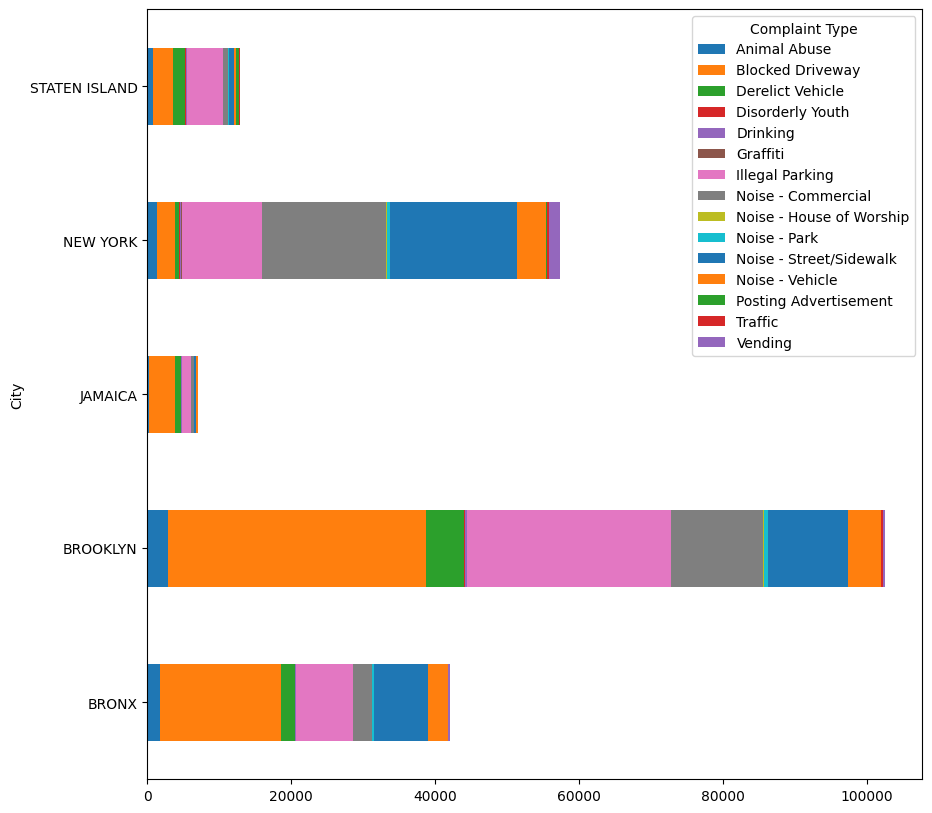

In [62]:
# Visualing the top 5 cities on the basis of city complaints

top5city_df.groupby(["City", "Complaint Type"]).size().unstack().plot(kind="barh", stacked=True, figsize=(10, 10))

In [64]:
# Scatter plot and hexbin plot for brooklyn

df["Borough"].unique().tolist()

['MANHATTAN', 'QUEENS', 'BRONX', 'BROOKLYN', 'STATEN ISLAND']

In [65]:
brooklyn_df=df[df["Borough"]=="BROOKLYN"]

<Axes: title={'center': 'Complaint concentration across Brooklyn'}, xlabel='Longitude', ylabel='Latitude'>

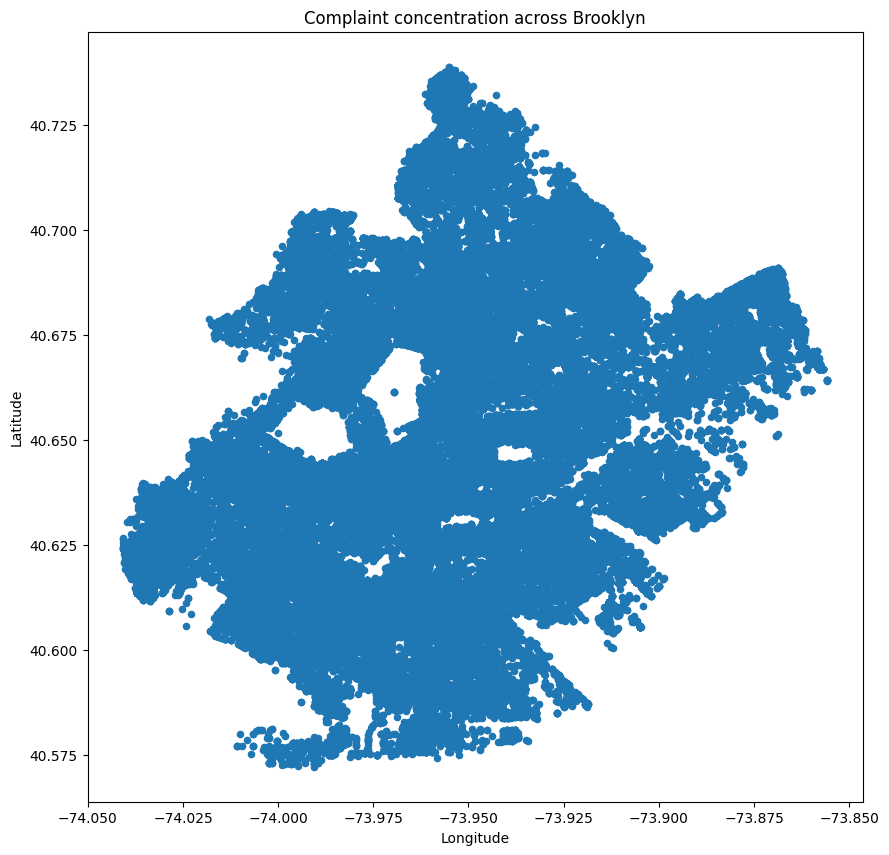

In [ ]:
# Scatter plot

brooklyn_df[["Latitude", "Longitude"]].plot(kind="scatter", x="Longitude", y="Latitude", title="Complaint concentration across Brooklyn", figsize=(10,10))

<Axes: title={'center': 'Complaint concentration across Brooklyn'}, xlabel='Longitude', ylabel='Latitude'>

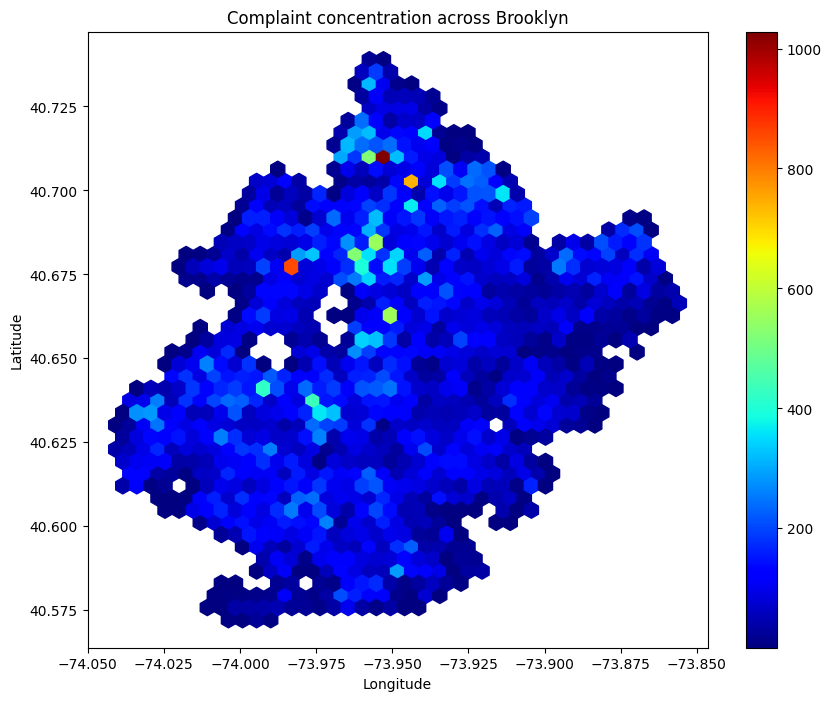

In [75]:
# Hexbin plot

brooklyn_df[["Latitude", "Longitude"]].plot(kind="hexbin", x="Longitude", y="Latitude", title="Complaint concentration across Brooklyn", figsize=(10,8), gridsize=40, colormap="jet", mincnt=1)

In [76]:
# Now, let's find out the major complaint types

df["Complaint Type"].value_counts()

Complaint Type
Blocked Driveway            98668
Illegal Parking             73719
Noise - Street/Sidewalk     40444
Noise - Commercial          39919
Derelict Vehicle            17706
Noise - Vehicle             13763
Animal Abuse                 8968
Vending                      2451
Noise - Park                 1289
Drinking                     1124
Traffic                      1087
Noise - House of Worship      803
Posting Advertisement         645
Disorderly Youth              208
Graffiti                      138
Name: count, dtype: int64

<Axes: title={'center': 'Most common complaints'}, ylabel='Complaint Type'>

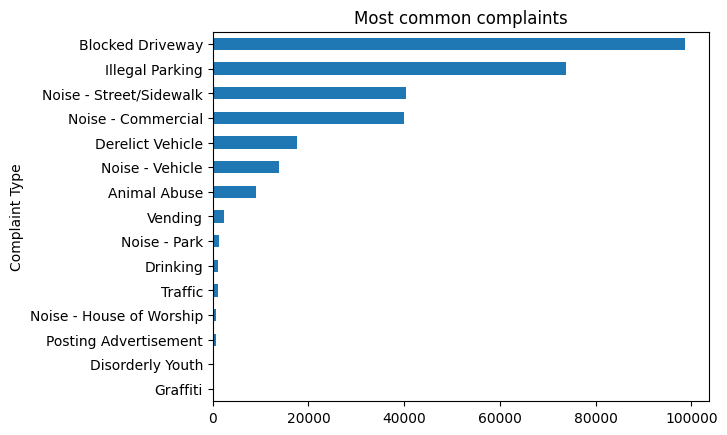

In [84]:
# Plotting a bar graph for complaint types vs count

df["Complaint Type"].value_counts(ascending=True).plot(kind="barh", title="Most common complaints")

In [86]:
# Top 10 types of complaints

df["Complaint Type"].value_counts().head(10)

Complaint Type
Blocked Driveway           98668
Illegal Parking            73719
Noise - Street/Sidewalk    40444
Noise - Commercial         39919
Derelict Vehicle           17706
Noise - Vehicle            13763
Animal Abuse                8968
Vending                     2451
Noise - Park                1289
Drinking                    1124
Name: count, dtype: int64

In [92]:
# Average response times across various types of complaints

df["Resolution time"]=(df["Closed Date"]-df["Created Date"]).dt.days

<Axes: ylabel='Complaint Type'>

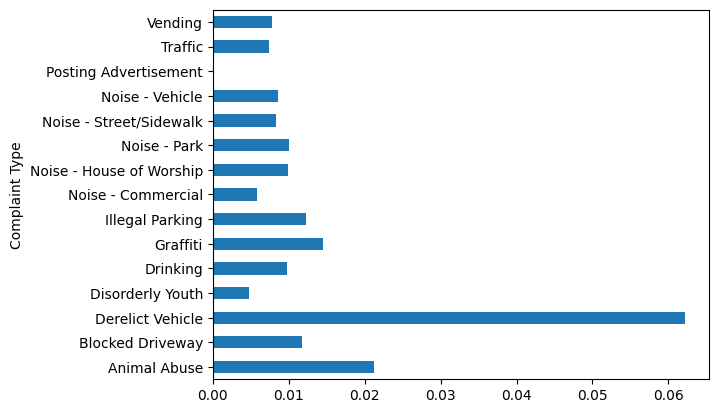

In [106]:
df.groupby("Complaint Type")["Resolution time"].mean().plot(kind="barh")